# 案例分析
# 武汉 - 湖北（除武汉外） - 湖北以外 疫情对比

### 1. 载入数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils   # some convenient functions
import matplotlib.font_manager as mfm

%load_ext autoreload
%autoreload 2

In [4]:
%pdb off

Automatic pdb calling has been turned OFF


In [2]:
raw = utils.load_chinese_raw()

Last update:  2020-05-01 11:17:19
Data date range:  2020-01-22 to 2020-05-01
Number of rows in raw data:  159230


In [3]:
raw.head()

continentName continentEnglishName countryName        countryEnglishName  \
0            亚洲                 Asia          印度                     India   
1           北美洲        North America          美国  United States of America   
2           大洋洲              Oceania        澳大利亚                 Australia   
3            欧洲               Europe         卢森堡                Luxembourg   
4            亚洲                 Asia         新加坡                 Singapore   

  province_name       provinceEnglishName  province_zipCode  \
0            印度                     India            953003   
1            美国  United States of America            971002   
2          澳大利亚                 Australia            990001   
3           卢森堡                Luxembourg            961004   
4           新加坡                 Singapore            952009   

   province_confirmed  province_suspected  province_cured  province_dead  \
0               33610                 0.0            8373           1075   
1             1069424                 0.0          153947          62996   
2                6762                 0.0            5600             92   
3                3784                 0.0            3134             90   
4               16169                 0.0            1244             15   

          update_time city_name cityEnglishName  city_zipCode  city_confirmed  \
0 2020-05-01 11:17:19       NaN             NaN           NaN             NaN   
1 2020-05-01 11:04:57       NaN             NaN           NaN             NaN   
2 2020-05-01 11:04:57       NaN             NaN           NaN             NaN   
3 2020-05-01 11:04:57       NaN             NaN           NaN             NaN   
4 2020-05-01 10:18:59       NaN             NaN           NaN             NaN   

   city_suspected  city_cured  city_dead update_date  
0             NaN         NaN        NaN  2020-05-01  
1             NaN         NaN        NaN  2020-05-01  
2             NaN         NaN        NaN  2020-05-01  
3             NaN         NaN        NaN  2020-05-01  
4             NaN         NaN        NaN  2020-05-01

In [10]:
wuhan_raw = raw[raw['city_name'] == '武汉']
wuhan_raw[wuhan_raw['update_date'] == pd.to_datetime('2020-03-03')]

continentName continentEnglishName countryName countryEnglishName  \
93104            亚洲                 Asia          中国              China   
93240            亚洲                 Asia          中国              China   
93503            亚洲                 Asia          中国              China   
94048            亚洲                 Asia          中国              China   

      province_name provinceEnglishName  province_zipCode  province_confirmed  \
93104           湖北省               Hubei            420000               67217   
93240           湖北省               Hubei            420000               67217   
93503           湖北省               Hubei            420000               67217   
94048           湖北省               Hubei            420000               67217   

       province_suspected  province_cured  province_dead         update_time  \
93104                 0.0           36208           2835 2020-03-03 19:41:02   
93240                 0.0           36203           2835 2020-03-03 18:09:01   
93503                 0.0           36199           2834 2020-03-03 15:13:12   
94048                 0.0           36167           2834 2020-03-03 08:27:46   

      city_name cityEnglishName  city_zipCode  city_confirmed  city_suspected  \
93104        武汉           Wuhan      420100.0         49426.0             0.0   
93240        武汉           Wuhan      420100.0         49426.0             0.0   
93503        武汉           Wuhan      420100.0         49426.0             0.0   
94048        武汉           Wuhan      420100.0         49315.0             0.0   

       city_cured  city_dead update_date  
93104     23068.0     2252.0  2020-03-03  
93240     23063.0     2252.0  2020-03-03  
93503     23063.0     2251.0  2020-03-03  
94048     21349.0     2227.0  2020-03-03

In [5]:
data = utils.load_chinese_data()

Last update:  2020-04-24 20:45:30
Data date range:  2020-01-22 to 2020-04-24
Number of rows in raw data:  150098


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [3]:
daily_frm = utils.aggDaily(data)

### 2. 把数据分成 武汉 -- 湖北（除武汉） -- 全国（除湖北） 三个区域各自整合

In [6]:
wuhan = daily_frm[daily_frm['city_name'] == '武汉'].groupby('update_date').agg('sum')
hubei_exWuhan = daily_frm[(daily_frm['province_name'] == '湖北省') & (daily_frm['city_name'] != '武汉')].groupby('update_date').agg('sum')
china_exHubei = daily_frm[daily_frm['province_name'] != '湖北省'].groupby('update_date').agg('sum')

contrast_frm = pd.merge(wuhan.add_suffix('_Wuhan'), hubei_exWuhan.add_suffix('_Hubei_exWuhan'), 'left', on='update_date')
contrast_frm = pd.merge(contrast_frm, china_exHubei.add_suffix('_China_exHubei'), 'left', on='update_date')

#### 画图比较确诊人数和死亡人数

KeyError: "None of [Index(['confirmed_Wuhan', 'confirmed_Hubei_exWuhan',\n       'confirmed_China_exHubei'],\n      dtype='object')] are in the [columns]"

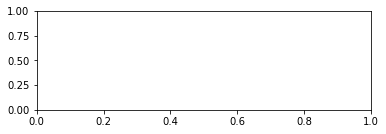

In [7]:
locations = ('Wuhan', 'Hubei_exWuhan', 'China_exHubei')
fig = plt.figure()
ax1 = fig.add_subplot(211)
contrast_frm.plot(y=['confirmed_' + suffix for suffix in locations], grid=True, figsize=(13, 8), style=['-*', '--*', ':*'], ax=ax1)
ax1.set_title('确诊人数对比', fontproperties=utils._FONT_PROP_, fontsize=15)
ax2 = fig.add_subplot(212)
contrast_frm.plot(y=['dead_' + suffix for suffix in locations], grid=True, figsize=(13, 8), style=['-*', '--*', ':*'], ax=ax2, sharex=True)
ax2.set_title('死亡人数对比', fontproperties=utils._FONT_PROP_, fontsize=15)
plt.show()

从上图可以看出，虽然武汉，湖北除武汉，全国除湖北三个区域的确诊人数接近，但是死亡人数却有极大的差异：

武汉 >> 湖北除武汉 >> 全国除湖北

这是为什么呢？

我们定义一个“简单死亡率” (Simple Death Rate)

$$简单死亡率(t) \equiv \frac{死亡人数(t)}{确诊人数(t)}$$

In [23]:
for loc in locations:
    contrast_frm['simpleDeathRate_' + loc] = contrast_frm['dead_' + loc] / contrast_frm['confirmed_' + loc]

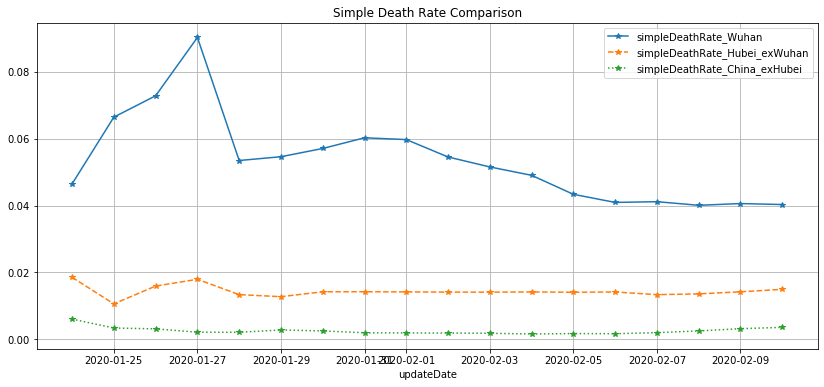

In [24]:
contrast_frm.plot(y=['simpleDeathRate_' + loc for loc in locations], grid=True, figsize=(14, 6), style=['-*', '--*', ':*'],
                 title='Simple Death Rate Comparison')

从上图可以看出，武汉死亡率 > 湖北（除武汉外）死亡率 > 全国其他地区死亡率

这说明武汉死亡人数高不是因为确诊人数多造成的。但是我们知道，死亡人数应该比确诊人数有个滞后，会不会是这个滞后造成计算不准确呢？

In [75]:
def lagDeathRate(df, location, lag):
    confirmed = df['confirmed_' + location][:-(lag+1)].to_numpy()
    if lag == 0:
        v = df['dailyNew_dead_' + location].to_numpy() / df['dailyNew_confirmed_' + location].to_numpy()
    else:
        v = df['dailyNew_dead_' + location][lag:].to_numpy() / df['dailyNew_confirmed_' + location][:-lag].to_numpy()
    return np.concatenate((np.array([np.nan] * (lag + 1)), v[1:]))

In [78]:
for lag in range(0, 14, 2):
    contrast_frm['lagDeath_' + str(lag) + '_Wuhan'] = lagDeathRate(contrast_frm, 'Wuhan', lag)
    contrast_frm['lagDeath_' + str(lag) + '_Hubei_exWuhan'] = lagDeathRate(contrast_frm, 'Hubei_exWuhan', lag)
    contrast_frm['lagDeath_' + str(lag) + '_China_exHubei'] = lagDeathRate(contrast_frm, 'China_exHubei', lag)

C:\Users\Jian\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jian\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


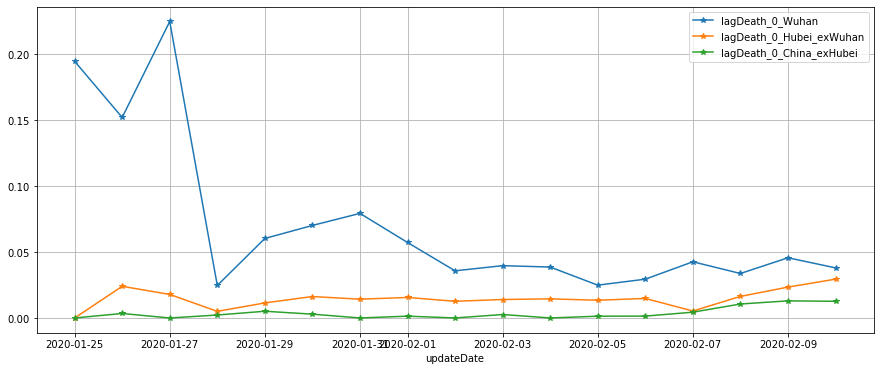

In [82]:
contrast_frm.plot(y=['lagDeath_0_Wuhan', 'lagDeath_0_Hubei_exWuhan', 'lagDeath_0_China_exHubei'], figsize=(15, 6), style='-*', grid=True)

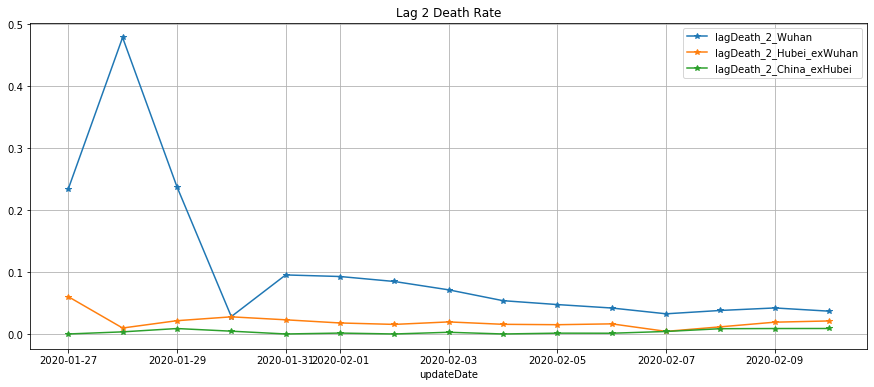

In [88]:
lag = 2
contrast_frm.plot(y=['lagDeath_' + str(lag) + '_Wuhan', 'lagDeath_' + str(lag) + '_Hubei_exWuhan', 'lagDeath_' + str(lag) + '_China_exHubei'], 
                  figsize=(15, 6), style='-*', grid=True, title='Lag ' + str(lag) + ' Death Rate')

In [84]:
contrast_frm.to_csv('death.csv', encoding='utf-8')

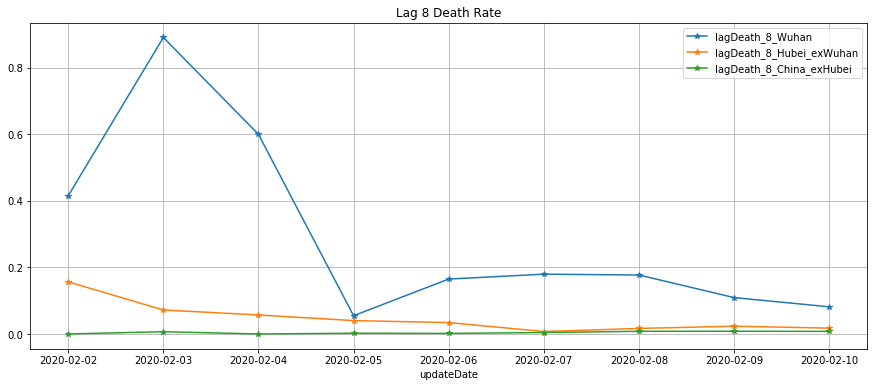

In [89]:
lag = 8
contrast_frm.plot(y=['lagDeath_' + str(lag) + '_Wuhan', 'lagDeath_' + str(lag) + '_Hubei_exWuhan', 'lagDeath_' + str(lag) + '_China_exHubei'], 
                  figsize=(15, 6), style='-*', grid=True, title='Lag ' + str(lag) + ' Death Rate')